# Is the weather good to play outside?

The folder `datasets` contains two files:


- `weather.numeric.csv`:

```
temperature,humidity,windy,play
85,85,0,no
80,90,1,no
83,86,0,yes
70,96,0,yes
68,80,0,yes
65,70,1,no
64,65,1,yes
72,95,0,no
69,70,0,yes
75,80,0,yes
75,70,1,yes
72,90,1,yes
81,75,0,yes
71,91,1,no
```

- `weather.nominal.csv`:

```
outlook,temperature,humidity,windy,play
sunny,hot,high,FALSE,no
sunny,hot,high,TRUE,no
overcast,hot,high,FALSE,yes
rainy,mild,high,FALSE,yes
rainy,cool,normal,FALSE,yes
rainy,cool,normal,TRUE,no
overcast,cool,normal,TRUE,yes
sunny,mild,high,FALSE,no
sunny,cool,normal,FALSE,yes
rainy,mild,normal,FALSE,yes
sunny,mild,normal,TRUE,yes
overcast,mild,high,TRUE,yes
overcast,hot,normal,FALSE,yes
rainy,mild,high,TRUE,no
```

Use Decision Tress from the `scikit-learn` library to create accurate models, first for the numerical dataset, then for the nominal dataset.

Explain your reasoning, and justify any choices of the hyperparameters (and/or run experiments to find the optimal ones).

Use the provided datasets for training, and create testing datasets based on your experience.

Evaluate your models, and use visualisation to show the trees and any relevant plots.

### Marking scheme

|Item|Mark|
|:----|---:|
|**Numerical dataset**:||
|Explanation, Justification|/4|
|DT model|/3|
|Evaluation|/3|
|**Nominal dataset**:||
|Explanation, Justification|/4|
|DT model|/3|
|Evaluation|/3|
|||
|**Total**:     |/20|


# explination 

To improve the model's efficacy, three decision tree variables can be altered. The first input is the criterion, which determines how the data is divided at each node. Three distinct types of criteria are available in Scikit-learn: Gini impurity, entropy, and logarithmic loss. Entropy measures the degree of dissimilarity between the samples, Gini impurity lowers the possibility of classification error, and logarithmic loss calculates the chance values. The second parameter, max_depth, controls the maximum degree of the decision tree. A deeper tree can categorise the data into more groups, but if the model becomes overly complex, overfitting may also occur.The splitter regulates node data splitting. The "best" splitter determines the optimum way to split, while the "random" splitter chooses a feature set at random. Most of the time, the "best" splitter is picked because it enhances performance. The "random" splitter works well for data that is noisy or has a lot of features.

In [158]:
import pandas as pd

In [159]:
data1 = pd.read_csv('datasets/weather.numeric.csv')
data2 = pd.read_csv('datasets/weather.nominal.csv')

In [160]:
data1

,temperature,humidity,windy,play
0,85,85,0,no
1,80,90,1,no
2,83,86,0,yes
3,70,96,0,yes
4,68,80,0,yes
5,65,70,1,no
6,64,65,1,yes
7,72,95,0,no
8,69,70,0,yes
9,75,80,0,yes


In [161]:
data2

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [162]:
data1_x = data1.loc[ : , "temperature" : "windy" ]
data1_y = data1.loc[ : , "play" ]

In [163]:
print( f"data1_x = { data1_x }\n\n" )

print( "Checking Null Values of numeric data1 Set, " )
print( f"data1_x.isnull().sum() :- \n{ data1_x.isnull().sum() }\n" )
print( f"data1_y.isnull().sum() :- \n{ data1_y.isnull().sum() }\n" )
print()

data1_x =     temperature  humidity  windy
0            85        85      0
1            80        90      1
2            83        86      0
3            70        96      0
4            68        80      0
5            65        70      1
6            64        65      1
7            72        95      0
8            69        70      0
9            75        80      0
10           75        70      1
11           72        90      1
12           81        75      0
13           71        91      1


Checking Null Values of numeric data1 Set, 
data1_x.isnull().sum() :- 
temperature    0
humidity       0
windy          0
dtype: int64

data1_y.isnull().sum() :- 
0




In [164]:
print( "Checking Data Type of  Data1 Set, " )
print( f"data1_x.dtypes :- \n{ data1_x.dtypes }\n" )
print( f"data1_y.dtypes :- \n{ data1_y.dtypes }\n" )
print()

Checking Data Type of  Data1 Set, 
data1_x.dtypes :- 
temperature    int64
humidity       int64
windy          int64
dtype: object

data1_y.dtypes :- 
object




In [165]:
#Data Spliting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( data1_x, data1_y,test_size = 0.2 )

print( f"x_train = { x_train }\n" )
print( f"y_train = { y_train }\n" )
print()
print( f"data1_x.shape = { data1_x.shape } and type( data1_x ) = { type( data1_x ) }" )
print( f"data1_y.shape = { data1_y.shape } and type( data1_y ) = { type( data1_y ) }" )
print( f"x_train.shape = { x_train.shape } and type( x_train ) = { type( x_train ) }" )
print( f"y_train.shape = { y_train.shape } and type( y_train ) = { type( y_train ) }" )

x_train =     temperature  humidity  windy
0            85        85      0
10           75        70      1
7            72        95      0
6            64        65      1
3            70        96      0
9            75        80      0
1            80        90      1
11           72        90      1
12           81        75      0
13           71        91      1
8            69        70      0

y_train = 0      no
10    yes
7      no
6     yes
3     yes
9     yes
1      no
11    yes
12    yes
13     no
8     yes
Name: play, dtype: object


data1_x.shape = (14, 3) and type( data1_x ) = <class 'pandas.core.frame.DataFrame'>
data1_y.shape = (14,) and type( data1_y ) = <class 'pandas.core.series.Series'>
x_train.shape = (11, 3) and type( x_train ) = <class 'pandas.core.frame.DataFrame'>
y_train.shape = (11,) and type( y_train ) = <class 'pandas.core.series.Series'>


In [166]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
x_train = ssc.fit_transform( x_train )

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


dtg= DecisionTreeClassifier( criterion = 'gini', splitter= 'best' )
dtg.fit(x_train,y_train)
print(f"dtg :- \n{dtg}\n")

dte = DecisionTreeClassifier( criterion = 'entropy', splitter= 'random' )
dte.fit(x_train,y_train)
print( f"dte :- \n{ dte }\n" )


dtg :- 
DecisionTreeClassifier()

dte :- 
DecisionTreeClassifier(criterion='entropy', splitter='random')



In [168]:
predictions=dtg.predict(x_test)
dtgg_predict = dtg.predict(x_test)
print ("predictions:", dtgg_predict)


predictions: ['no' 'no' 'no']


C:\Users\sneha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\sneha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [169]:
predictions=dte.predict(x_test)
dteg_predict = dte.predict(x_test)
print ("predictions:", dteg_predict)

predictions: ['no' 'no' 'no']


C:\Users\sneha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\sneha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [170]:
from sklearn.metrics import accuracy_score
acu =accuracy_score(y_test,dtgg_predict)
print(acu)

0.3333333333333333


In [171]:
acuu =accuracy_score(y_test,dteg_predict)
print(acuu)

0.3333333333333333


|--- feature_1 <= 82.50
|   |--- feature_0 <= 66.50
|   |   |--- feature_1 <= 67.50
|   |   |   |--- class: yes
|   |   |--- feature_1 >  67.50
|   |   |   |--- class: no
|   |--- feature_0 >  66.50
|   |   |--- class: yes
|--- feature_1 >  82.50
|   |--- feature_1 <= 95.50
|   |   |--- feature_1 <= 90.50
|   |   |   |--- feature_0 <= 76.00
|   |   |   |   |--- class: yes
|   |   |   |--- feature_0 >  76.00
|   |   |   |   |--- feature_0 <= 81.50
|   |   |   |   |   |--- class: no
|   |   |   |   |--- feature_0 >  81.50
|   |   |   |   |   |--- feature_0 <= 84.00
|   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |--- feature_0 >  84.00
|   |   |   |   |   |   |--- class: no
|   |   |--- feature_1 >  90.50
|   |   |   |--- class: no
|   |--- feature_1 >  95.50
|   |   |--- class: yes



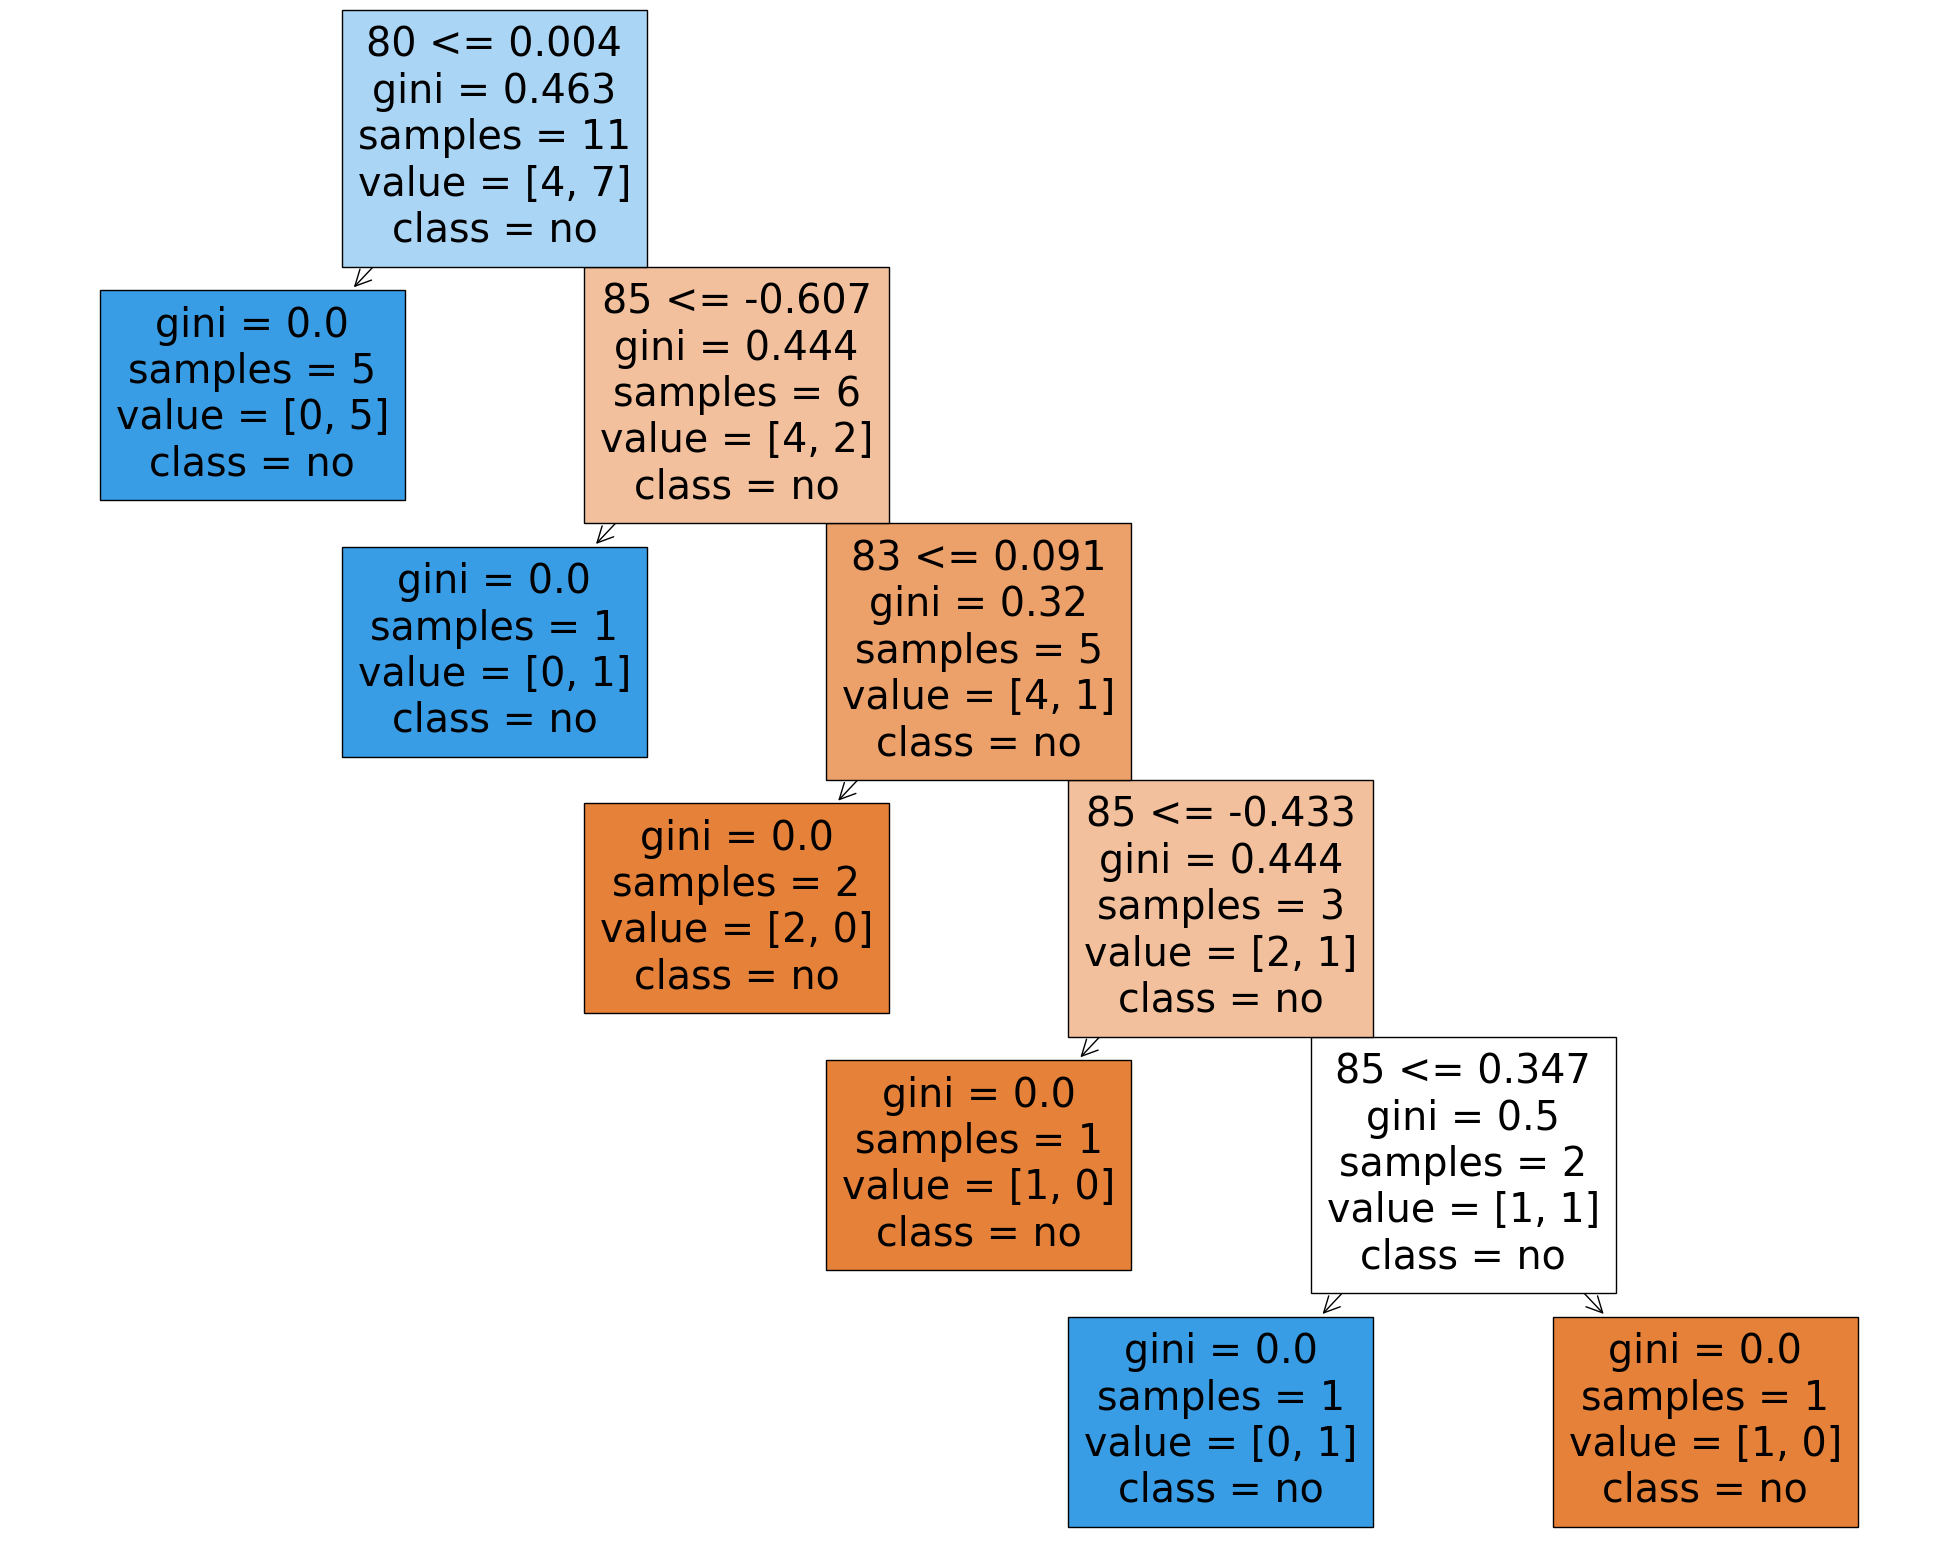

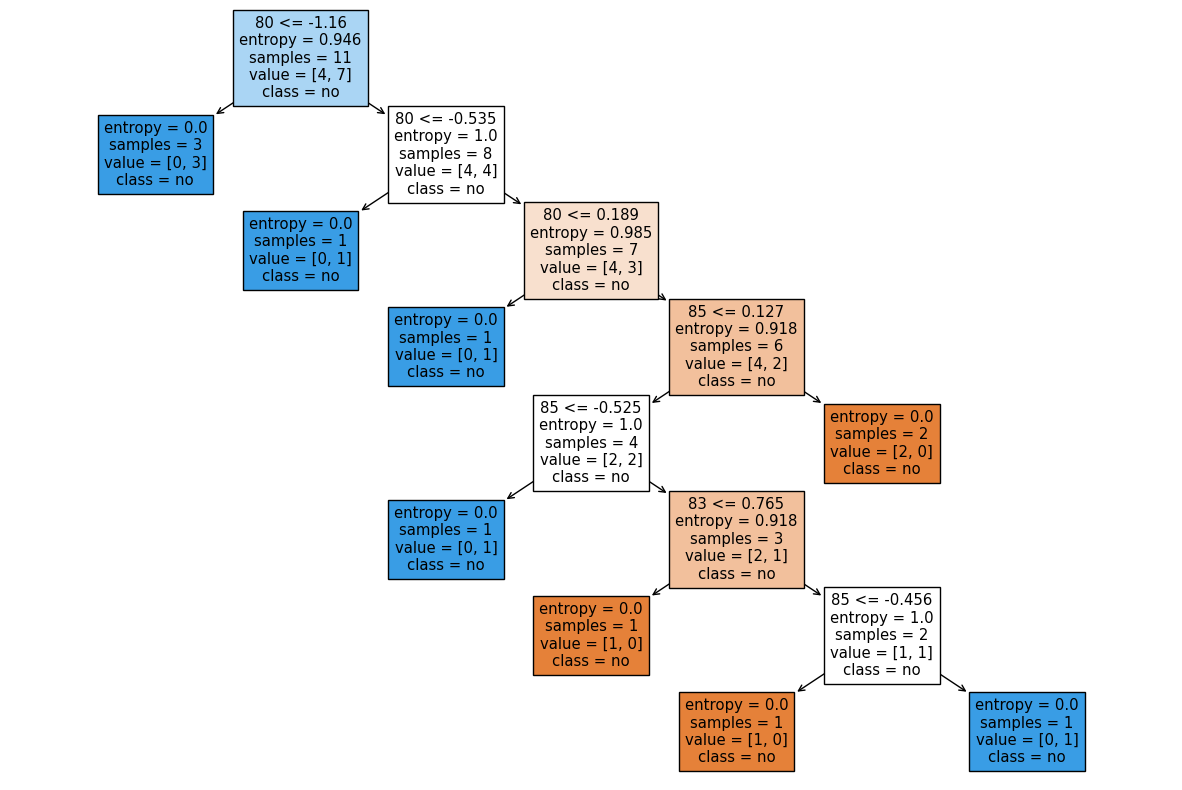

In [172]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(data1_x, data1_y)

text_representation = tree.export_text(clf)
print(text_representation)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dtg, 
                feature_names=data1.temperature,  
                class_names=data1.play,
                filled=True)
    fig = plt.figure(figsize=(15,10))
    _ = tree.plot_tree(dte, 
                feature_names=data1.temperature,  
                class_names=data1.play,
                filled=True)

# justification
Based on many code runs with custom test data, a decision tree classifier with a maximum depth of 2 and either the Gini or entropy criterion with both "best" and "random" splitters had a higher and more constant accuracy rate than other depths. The decision tree is too small for a maximum depth of 1. If the maximum depth is 2 or more, the decision tree may grow excessively complicated and overfit the training data, which makes it hard to generalise the training data to the test data. So, increasing the maximum depth to 2 may help find a balance between getting important data and preventing overfitting. This could lead to higher and more steady accuracy rates. The "best" splitter is the default. However, the "random" splitter works well for the decision tree classifier when the data is noisy or has a lot of dimensions.

In [173]:
data2

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [174]:
a=pd.get_dummies(data2[['temperature','humidity','play']])
b=pd.get_dummies(data2[['windy','outlook']])

In [175]:
x_train, x_test, y_train, y_test = train_test_split( data1_x, data1_y,test_size = 0.2 )

In [176]:
dtg1= DecisionTreeClassifier( criterion = 'gini', splitter= 'best' )
dtg1.fit(x_train,y_train)
print( f"dtg1 :- \n{dtg1}\n" )

dte1 = DecisionTreeClassifier( criterion = 'entropy', splitter= 'random' )
dte1.fit(x_train,y_train)
print( f"dte1 :- \n{ dte1 }\n" )

dtg1 :- 
DecisionTreeClassifier()

dte1 :- 
DecisionTreeClassifier(criterion='entropy', splitter='random')



In [177]:
predictions=dtg1.predict(x_test)
dtgg1_predict = dtg1.predict(x_test)
print ("predictions:", dtgg1_predict)

predictions: ['no' 'no' 'yes']


In [178]:
predictions=dte1.predict(x_test)
dteg1_predict = dte1.predict(x_test)
print ("predictions:", dteg1_predict)

predictions: ['no' 'no' 'yes']


In [179]:
from sklearn.metrics import accuracy_score
accu =accuracy_score(y_test,dtgg1_predict)
print(accu)

0.3333333333333333


In [180]:
acuur =accuracy_score(y_test,dteg1_predict)
print(acuur)

0.3333333333333333


|--- feature_1 <= 82.50
|   |--- feature_0 <= 66.50
|   |   |--- feature_1 <= 67.50
|   |   |   |--- class: yes
|   |   |--- feature_1 >  67.50
|   |   |   |--- class: no
|   |--- feature_0 >  66.50
|   |   |--- class: yes
|--- feature_1 >  82.50
|   |--- feature_1 <= 95.50
|   |   |--- feature_1 <= 90.50
|   |   |   |--- feature_0 <= 76.00
|   |   |   |   |--- class: yes
|   |   |   |--- feature_0 >  76.00
|   |   |   |   |--- feature_0 <= 81.50
|   |   |   |   |   |--- class: no
|   |   |   |   |--- feature_0 >  81.50
|   |   |   |   |   |--- feature_0 <= 84.00
|   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |--- feature_0 >  84.00
|   |   |   |   |   |   |--- class: no
|   |   |--- feature_1 >  90.50
|   |   |   |--- class: no
|   |--- feature_1 >  95.50
|   |   |--- class: yes



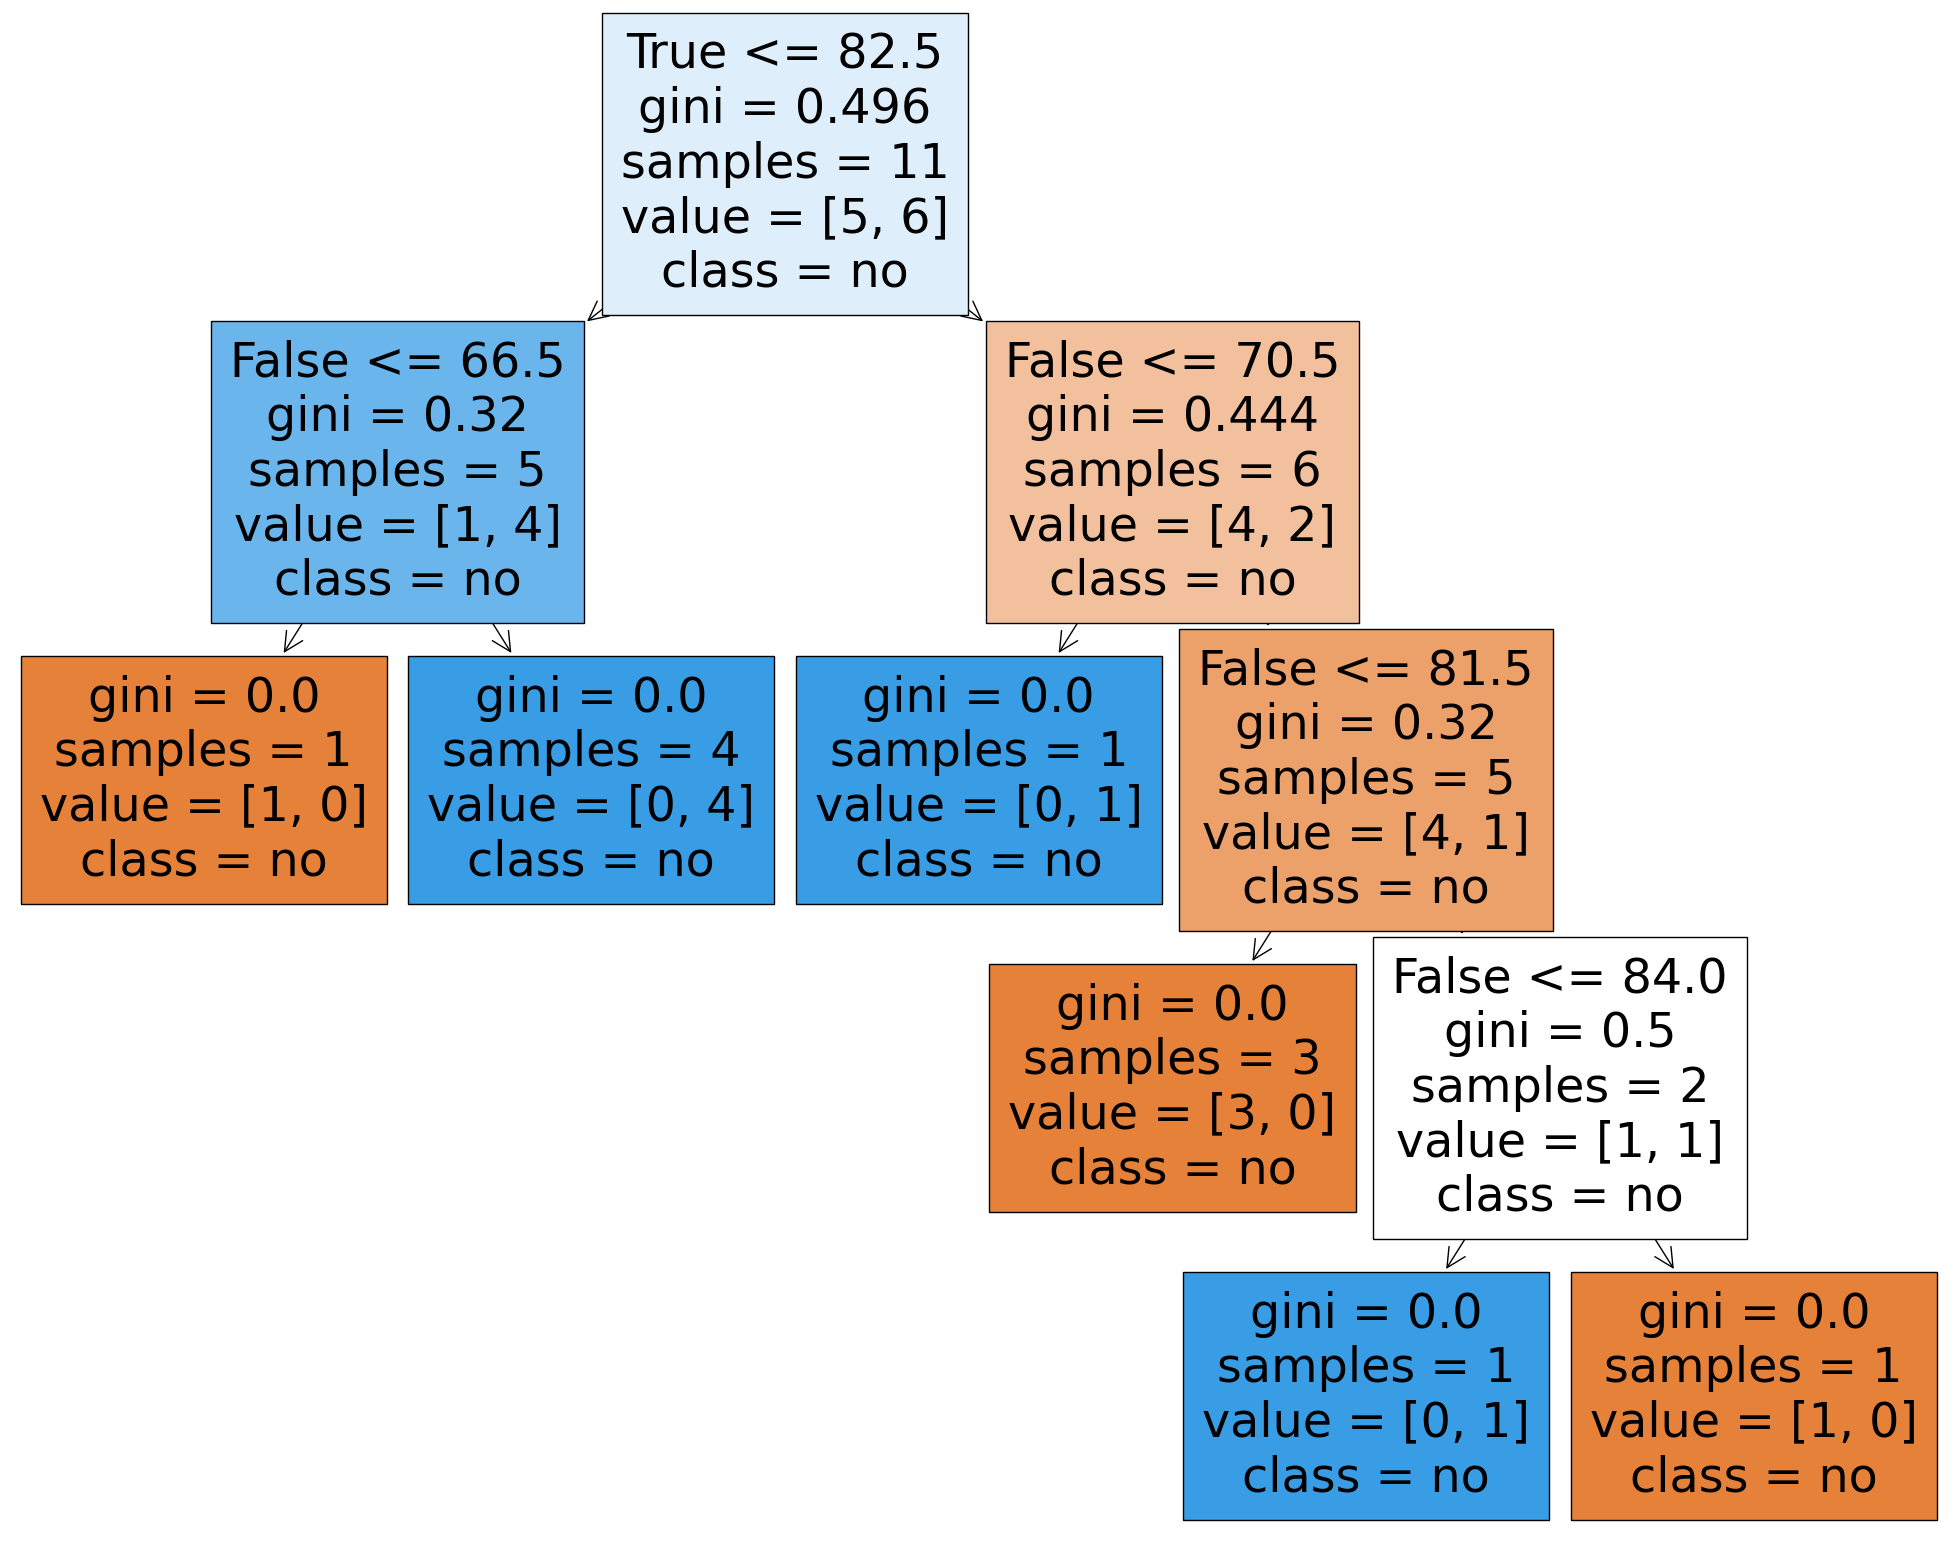

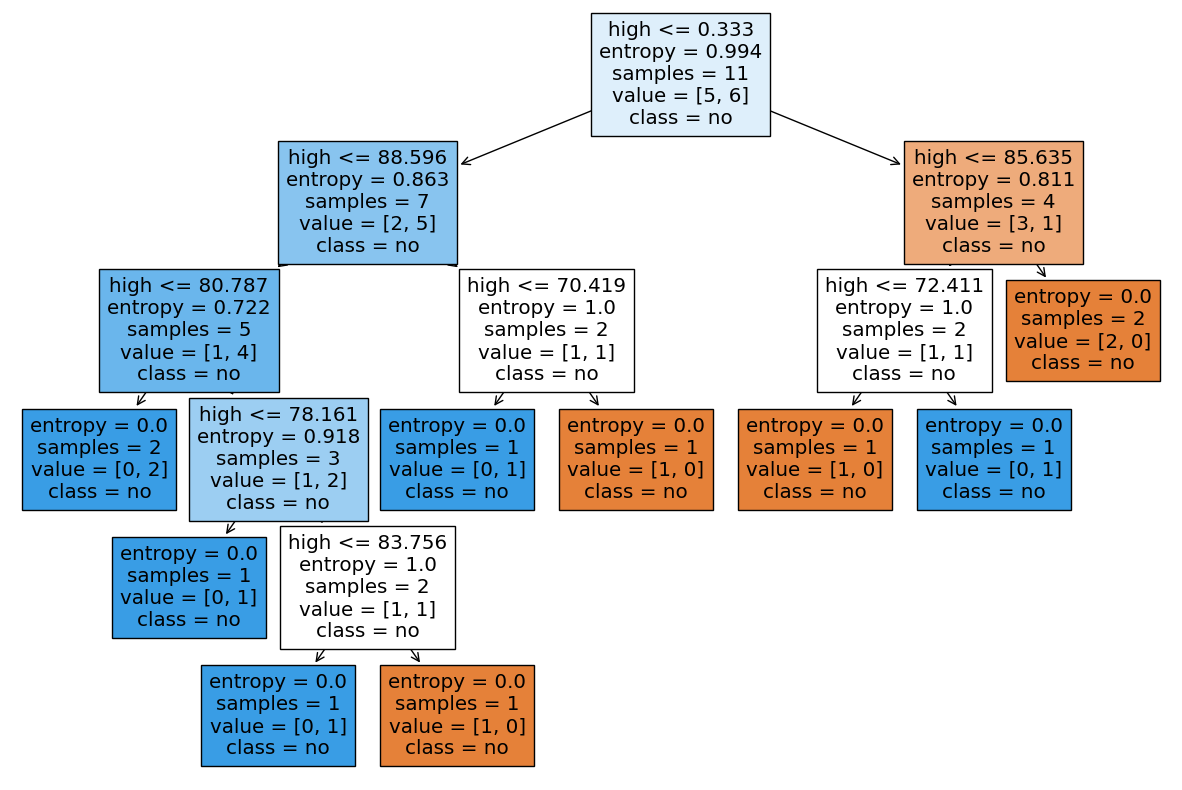

In [181]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(data1_x, data1_y)

text_representation = tree.export_text(clf)
print(text_representation)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dtg1, 
                feature_names=data2.windy,  
                class_names=data2.play,
                filled=True)
    fig = plt.figure(figsize=(15,10))
    _ = tree.plot_tree(dte1, 
                feature_names=data2.humidity,  
                class_names=data2.play,
                filled=True)

# justification

The information mentioned before was observed to determine if changing the criterion would enhance accuracy. "Random" and "Best" splitters mixed data and improved classification. Gini impurity and entropy decision tree classifiers were more accurate than Log Loss. The Gini impurity and entropy criterion help the decision tree to capture essential data qualities and make better predictions. 'Random' and 'Best' splitters improve classification accuracy and data variety in decision trees. Try multiple criteria and splitters to find the optimum dataset settings.

# Conclusion

Decision trees were used to organise data, evaluate and visualise it, and reduce the amount of work needed to do all of these things. Decision tree optimisation and pruning improve accuracy and generality by getting rid of overfitting and choosing the right hyperparameters. Using Gini impurity and entropy, decision trees sort data by how it is split and how clean it is. This can help find patterns in the data and make better predictions. The data for the work may be limited, and custom test data may be used. Data and test data help optimisation. Decision trees are a powerful machine learning tool that may be used to classify, predict, and show things. Using pruning and hyperparameter modification, a dataset's decision trees can be made to work best for it.

# List of references

Piotr Płoński (June 22, 2020 )Visualize a Decision Tree in 4 Ways with Scikit-Learn and Python https://mljar.com/blog/visualize-decision-tree/